In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import root_mean_squared_error
import pickle

In [85]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2025-01.parquet')

In [86]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,1,2025-01-01 00:18:38,2025-01-01 00:26:59,1.0,1.60,1.0,N,229,237,1,10.0,3.5,0.5,3.00,0.0,1.0,18.00,2.5,0.0,0.0
1,1,2025-01-01 00:32:40,2025-01-01 00:35:13,1.0,0.50,1.0,N,236,237,1,5.1,3.5,0.5,2.02,0.0,1.0,12.12,2.5,0.0,0.0
2,1,2025-01-01 00:44:04,2025-01-01 00:46:01,1.0,0.60,1.0,N,141,141,1,5.1,3.5,0.5,2.00,0.0,1.0,12.10,2.5,0.0,0.0
3,2,2025-01-01 00:14:27,2025-01-01 00:20:01,3.0,0.52,1.0,N,244,244,2,7.2,1.0,0.5,0.00,0.0,1.0,9.70,0.0,0.0,0.0
4,2,2025-01-01 00:21:34,2025-01-01 00:25:06,3.0,0.66,1.0,N,244,116,2,5.8,1.0,0.5,0.00,0.0,1.0,8.30,0.0,0.0,0.0


In [87]:
df = df[:10000].copy()

In [88]:
df['duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).apply(lambda tz: tz.seconds / 60)

<Axes: xlabel='duration', ylabel='Count'>

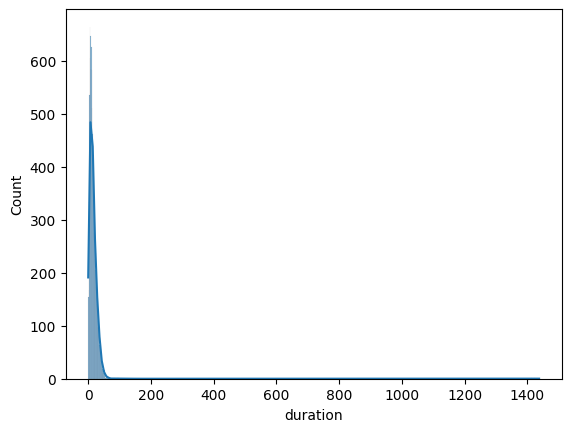

In [89]:
sns.histplot(df['duration'], kde=True)

In [90]:
df['duration'].describe(percentiles = [.98, 0.99])

count    10000.000000
mean        15.630185
std         30.135382
min          0.000000
50%         12.333333
98%         42.135333
99%         47.933667
max       1437.050000
Name: duration, dtype: float64

In [91]:
df = df[((df.duration >= 1) & (df.duration <= 60))]

In [92]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [93]:
df[categorical] = df[categorical].astype(str)

In [94]:
train_dicts = df[categorical + numerical].to_dict(orient = 'records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [95]:
X_train.toarray()

array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.6 ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.5 ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.6 ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 9.51],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 9.51],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.18]])

In [96]:
target = 'duration'
y_train = df[target].values

In [97]:
y_train

array([ 8.35      ,  2.55      ,  1.95      , ..., 29.6       ,
       29.6       ,  5.88333333])

In [117]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = lr.predict(X_train)

In [119]:
root_mean_squared_error(y_train, y_pred)

5.9056022396916665

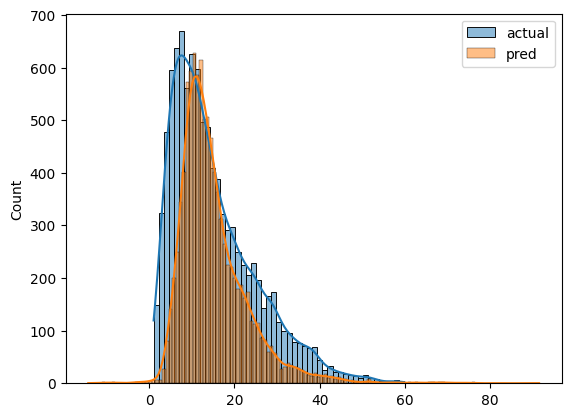

In [120]:
sns.histplot(y_train, kde=True, label='actual')
sns.histplot(y_pred, kde=True, label='pred')

plt.legend()

In [122]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [114]:
lr = Ridge()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

5.9603877483921375

In [115]:
lr = Lasso()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

7.37664423082317